In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [36]:
warnings.filterwarnings("ignore")

In [37]:
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("Kütüphaneler yüklendi ve ayarlar yapıldı.")

Kütüphaneler yüklendi ve ayarlar yapıldı.


In [38]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2024-csv/World-happiness-report-2024.csv')

print("1. VERİ SETİNE İLK BAKIŞ")
print("-" * 30)
print(f"Veri Seti Boyutu (Satır, Sütun): {df.shape}")
print("\nVeri Setinden İlk 5 Satır:")
print(df.head())

print("\nVeri Tipleri ve Bellek Bilgisi:")
print(df.info())

1. VERİ SETİNE İLK BAKIŞ
------------------------------
Veri Seti Boyutu (Satır, Sütun): (143, 12)

Veri Setinden İlk 5 Satır:
  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277 

In [39]:
# @title
print("\n2. EKSİK VERİ ANALİZİ ")
print("-" * 30)
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Eksik Değer Sayısı': null_counts, 'Yüzde (%)': null_percentages})
print(missing_df[missing_df['Eksik Değer Sayısı'] > 0])

if df.isnull().sum().sum() == 0:
    print("\n Veri setinde eksik (NaN) değer bulunmamaktadır. Dolayısıyla doldurma veya silme işlemine gerek yoktur.")
else:
    print("\n Eksik veriler mevcuttur, görselleştirme öncesi incelenmelidir.")


2. EKSİK VERİ ANALİZİ 
------------------------------
                              Eksik Değer Sayısı  Yüzde (%)
Log GDP per capita                             3      2.098
Social support                                 3      2.098
Healthy life expectancy                        3      2.098
Freedom to make life choices                   3      2.098
Generosity                                     3      2.098
Perceptions of corruption                      3      2.098
Dystopia + residual                            3      2.098

 Eksik veriler mevcuttur, görselleştirme öncesi incelenmelidir.


In [40]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
missing_cols = [col for col in numeric_columns if df[col].isnull().sum() > 0]

if missing_cols:
    print("Değiştirilen Sütunlar:")
    group_col = 'Regional indicator'
    
    for col in missing_cols:
        count = df[col].isnull().sum()
        df[col] = df[col].fillna(df.groupby(group_col)[col].transform('median'))
        print(f"'{col}': {count} adet eksik veri, '{group_col}' medyanı ile dolduruldu.")
else:
    print("Eksik veri bulunamadı.")

Değiştirilen Sütunlar:
'Log GDP per capita': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.
'Social support': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.
'Healthy life expectancy': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.
'Freedom to make life choices': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.
'Generosity': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.
'Perceptions of corruption': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.
'Dystopia + residual': 3 adet eksik veri, 'Regional indicator' medyanı ile dolduruldu.


In [41]:
print("\n3. İSTATİSTİKSEL ÖZET VE OUTLIER KONTROLÜ")
print("-" * 30)
print(df.describe().T)


3. İSTATİSTİKSEL ÖZET VE OUTLIER KONTROLÜ
------------------------------
                               count  mean   std    min   25%   50%   75%  \
Ladder score                 143.000 5.528 1.171  1.721 4.726 5.785 6.416   
upperwhisker                 143.000 5.641 1.155  1.775 4.845 5.895 6.508   
lowerwhisker                 143.000 5.414 1.187  1.667 4.606 5.674 6.319   
Log GDP per capita           143.000 1.379 0.421  0.000 1.079 1.430 1.733   
Social support               143.000 1.136 0.330  0.000 0.925 1.236 1.377   
Healthy life expectancy      143.000 0.522 0.163  0.000 0.400 0.550 0.644   
Freedom to make life choices 143.000 0.619 0.162  0.000 0.523 0.641 0.734   
Generosity                   143.000 0.145 0.073  0.000 0.091 0.135 0.192   
Perceptions of corruption    143.000 0.154 0.125  0.000 0.069 0.121 0.191   
Dystopia + residual          143.000 1.577 0.532 -0.073 1.317 1.649 1.879   

                               max  
Ladder score                 7.741  
uppe

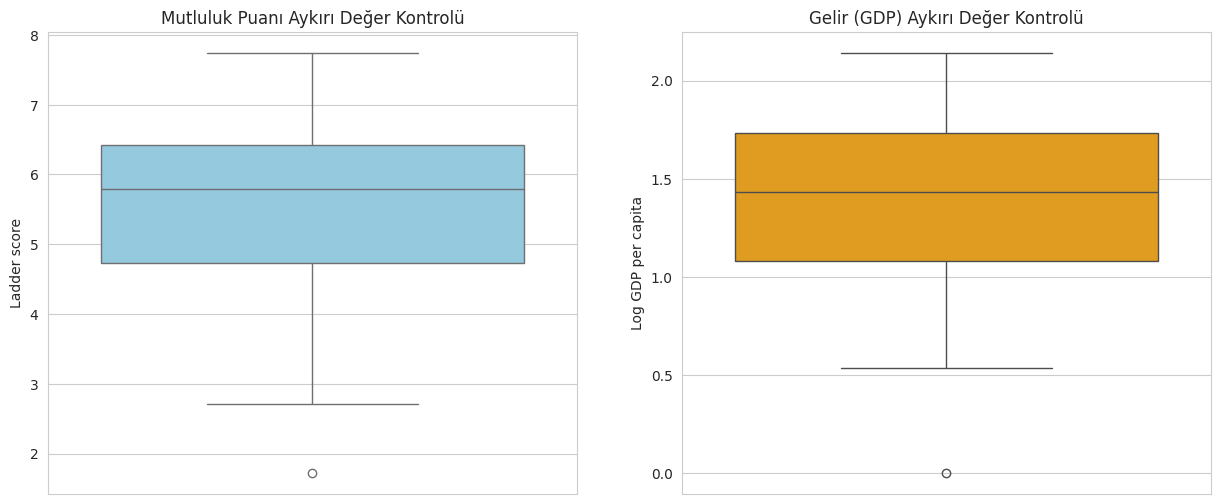

Boxplot grafiklerine baktığımızda, verilerin genel dağılımının dengeli olduğu, analizimizi bozacak aşırı uç değerlerin (extreme outliers) çok yoğun olmadığı görülmektedir.


In [42]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Ladder score'], color='skyblue')
plt.title('Mutluluk Puanı Aykırı Değer Kontrolü')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Log GDP per capita'], color='orange')
plt.title('Gelir (GDP) Aykırı Değer Kontrolü')
plt.show()

print("Boxplot grafiklerine baktığımızda, verilerin genel dağılımının dengeli olduğu, analizimizi bozacak aşırı uç değerlerin (extreme outliers) çok yoğun olmadığı görülmektedir.")

In [43]:
print("\n📢 NOT: AYKIRI DEĞERLER (OUTLIERS) HAKKINDA")
print("""
Yapılan Boxplot analizinde tespit edilen aykırı değerler (outliers),
veri hatası değildir. Ülkeler arasındaki sosyo-ekonomik uçurumlar sebebiyle oluşan gerçek gözlemlerdir.

Literatürde makine öğrenmesi (ML) modellerinin varyansını düşürmek için bu değerlere
genellikle 'Winsorization' (baskılama) veya IQR tabanlı silme işlemleri uygulanır. 
Çalışmada sadece görselleştirme yapıldığından dolayı herhangi bir işlem yapılmamışıtr.
""")


📢 NOT: AYKIRI DEĞERLER (OUTLIERS) HAKKINDA

Yapılan Boxplot analizinde tespit edilen aykırı değerler (outliers),
veri hatası değildir. Ülkeler arasındaki sosyo-ekonomik uçurumlar sebebiyle oluşan gerçek gözlemlerdir.

Literatürde makine öğrenmesi (ML) modellerinin varyansını düşürmek için bu değerlere
genellikle 'Winsorization' (baskılama) veya IQR tabanlı silme işlemleri uygulanır. 
Çalışmada sadece görselleştirme yapıldığından dolayı herhangi bir işlem yapılmamışıtr.



In [44]:
print("\n4. VERİ ÖN İŞLEME")
print("-" * 30)

old_columns = df.columns.tolist()
df = df.rename(columns={
    'Country name': 'Ülke',
    'Regional indicator': 'Bölge',
    'Ladder score': 'Mutluluk Puanı',
    'Log GDP per capita': 'Gelir',
    'Social support': 'Sosyal Destek',
    'Healthy life expectancy': 'Sağlıklı Yaşam',
    'Freedom to make life choices': 'Özgürlük',
    'Generosity': 'Cömertlik',
    'Perceptions of corruption': 'Yolsuzluk Algısı'
})
print("Sütun isimleri analiz kolaylığı için Türkçeleştirildi.\n")


4. VERİ ÖN İŞLEME
------------------------------
Sütun isimleri analiz kolaylığı için Türkçeleştirildi.



In [45]:
print("Türkiye ve Benzeri Ülkelerin Doğru Yazımı İçin Değişiklik:")
print(df[df['Ülke'].str.contains('Turkiye')]['Ülke'].values)

df['Ülke'] = df['Ülke'].str.strip().replace({
    'Turkiye': 'Turkey', 'United States': 'USA', 'Palestinian Territories': 'Palestine',
    'Hong Kong S.A.R. of China': 'Hong Kong', 'Taiwan Province of China': 'Taiwan',
    'Congo (Kinshasa)': 'DR Congo', 'Czechia': 'Czech Republic', 'North Macedonia': 'Macedonia',
    'Kosovo': 'Kosovo', 'Ivory Coast': "Côte d'Ivoire", 'Northern Cyprus': 'Cyprus'
})

print("\nDeğişiklik Sonrası:")
print(df[df['Ülke'].str.contains('Turkey')]['Ülke'].values)
print("Harita görselleştirmesinde hata almamak için ülke isimleri uluslararası standarda (ISO) uygun hale getirildi.")

Türkiye ve Benzeri Ülkelerin Doğru Yazımı İçin Değişiklik:
['Turkiye']

Değişiklik Sonrası:
['Turkey']
Harita görselleştirmesinde hata almamak için ülke isimleri uluslararası standarda (ISO) uygun hale getirildi.



5. KORELASYON ANALİZİ
------------------------------


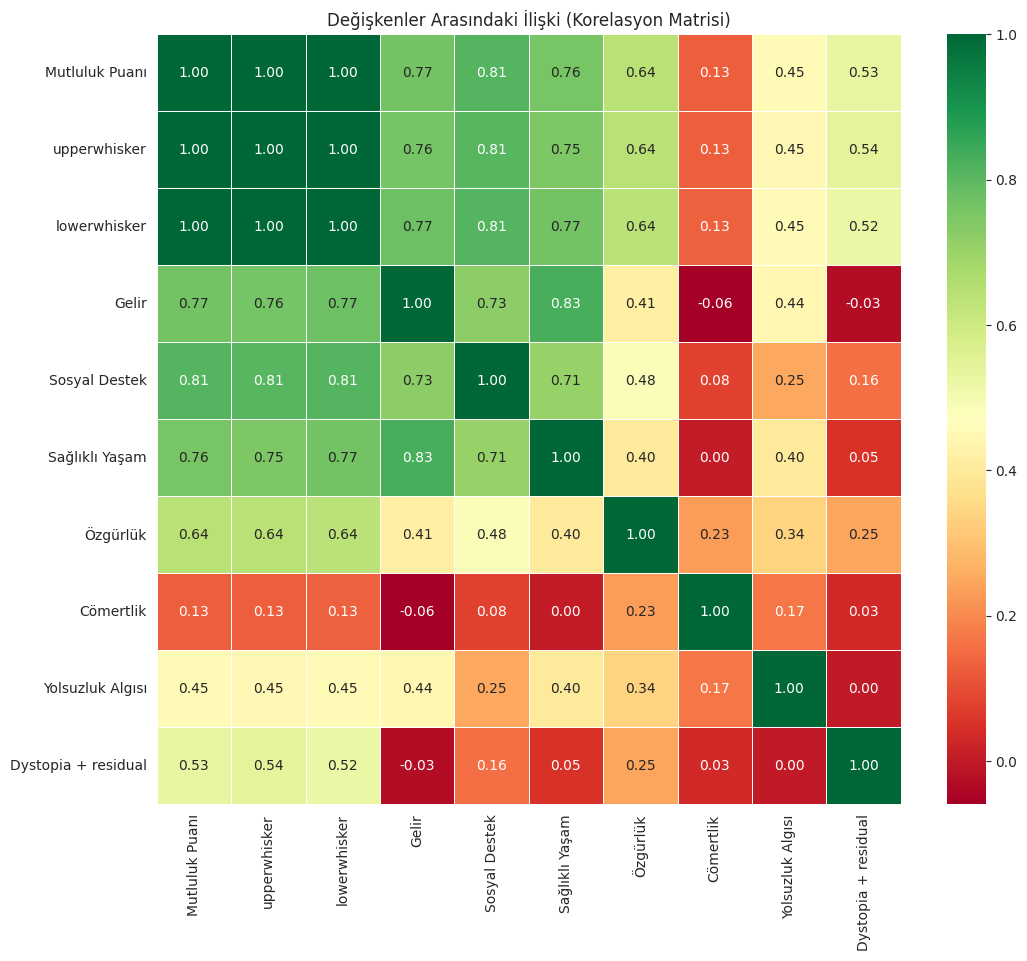


Korelasyon matrisine baktığımızda:
1. Mutluluk Puanı ile Gelir (GDP) (0.78) ve Sosyal Destek (0.81) arasında çok güçlü pozitif ilişki var.
2. Yolsuzluk Algısı ile Mutluluk arasında negatif bir ilişki var (-0.43). Yani yolsuzluk algısı arttıkça mutluluk azalıyor.
3. Sosyal Destek (0.81): Tablodaki en yüksek ilişki bu. Yalnız olmamak, zengin olmaktan daha değerli çıkmış.
4. Sağlık Parayla Geliyor (0.83): Zenginlik ile Sağlıklı Yaşam arasındaki ilişki çok yüksek. Ülke zenginleşince hastaneler düzeliyor, beslenme kalitesi artıyor, insanlar daha uzun yaşıyor.
5. Zenginlik = Cömertlik Değil (0.04): Aralarında neredeyse hiç bağ yok.Yani bir ülkenin çok zengin olması, insanlarının yardımsever olacağı anlamına gelmiyor.



In [46]:
print("\n5. KORELASYON ANALİZİ")
print("-" * 30)

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))

sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Değişkenler Arasındaki İlişki (Korelasyon Matrisi)')
plt.show()

print("""
Korelasyon matrisine baktığımızda:
1. Mutluluk Puanı ile Gelir (GDP) (0.78) ve Sosyal Destek (0.81) arasında çok güçlü pozitif ilişki var.
2. Yolsuzluk Algısı ile Mutluluk arasında negatif bir ilişki var (-0.43). Yani yolsuzluk algısı arttıkça mutluluk azalıyor.
3. Sosyal Destek (0.81): Tablodaki en yüksek ilişki bu. Yalnız olmamak, zengin olmaktan daha değerli çıkmış.
4. Sağlık Parayla Geliyor (0.83): Zenginlik ile Sağlıklı Yaşam arasındaki ilişki çok yüksek. Ülke zenginleşince hastaneler düzeliyor, beslenme kalitesi artıyor, insanlar daha uzun yaşıyor.
5. Zenginlik = Cömertlik Değil (0.04): Aralarında neredeyse hiç bağ yok.Yani bir ülkenin çok zengin olması, insanlarının yardımsever olacağı anlamına gelmiyor.
""")


In [47]:
from plotly.offline import init_notebook_mode
import plotly.io as pio

init_notebook_mode(connected=True)
pio.renderers.default = "iframe"
print("\n6. GÖRSELLEŞTİRME VE YORUMLAR")
print("-" * 30)
fig = px.choropleth(df, locations="Ülke", locationmode='country names', color="Mutluluk Puanı",
                    hover_name="Ülke", color_continuous_scale='RdYlGn',
                    title="Dünya Genelinde Mutluluk Dağılımı")
fig.show()
print(" Haritada Kuzey Amerika, Avrupa ve Avustralya'nın daha yeşil (mutlu), Afrika ve Güney Asya'nın kırmızı tonlarda (daha az mutlu) olduğu görülüyor.")


6. GÖRSELLEŞTİRME VE YORUMLAR
------------------------------


 Haritada Kuzey Amerika, Avrupa ve Avustralya'nın daha yeşil (mutlu), Afrika ve Güney Asya'nın kırmızı tonlarda (daha az mutlu) olduğu görülüyor.


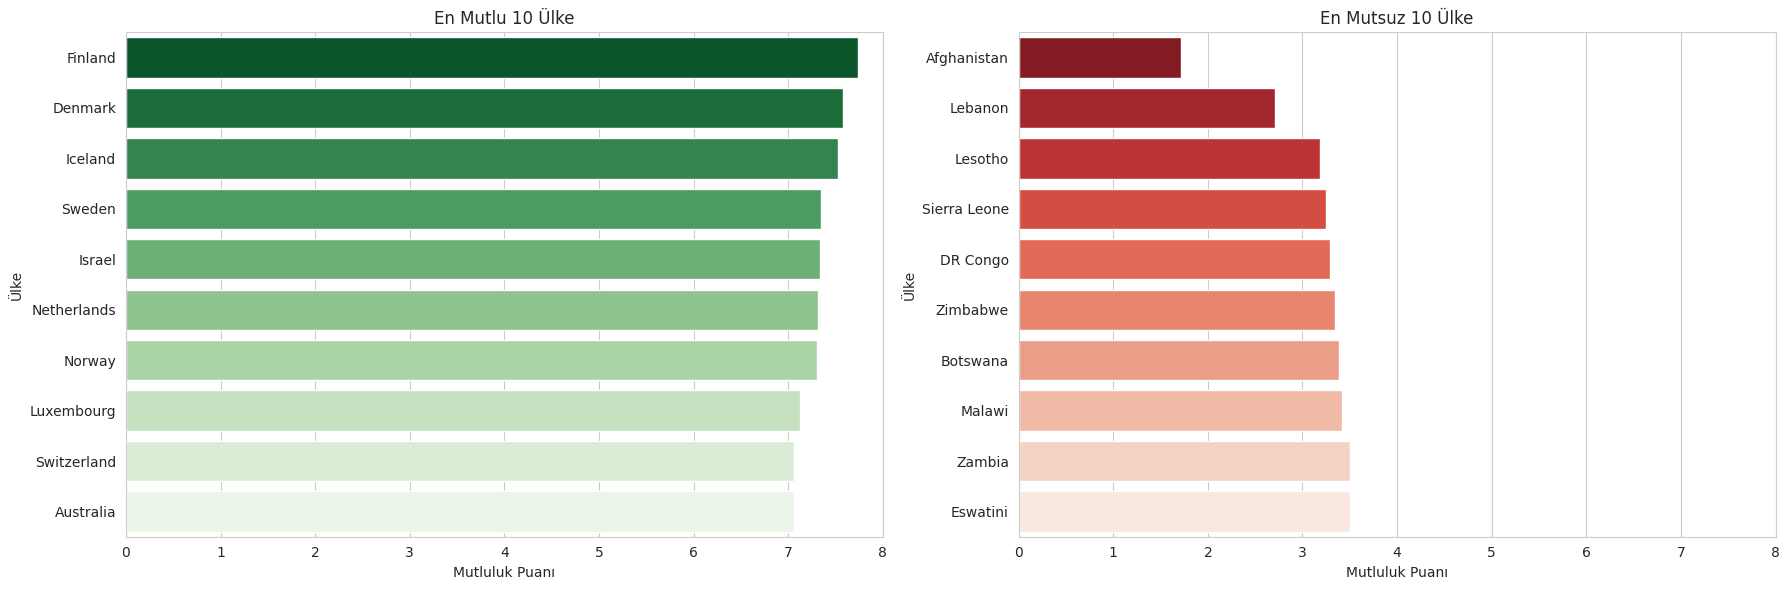

İskandinav ülkeleri (Finlandiya, Danimarka) listenin başında yer alırken, savaş veya ekonomik kriz yaşayan ülkeler (Afganistan, Lübnan) listenin sonunda yer alıyor.


In [48]:
top10 = df.nlargest(10, 'Mutluluk Puanı')
bot10 = df.nsmallest(10, 'Mutluluk Puanı')

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x='Mutluluk Puanı', y='Ülke', data=top10, palette='Greens_r', ax=ax[0])
ax[0].set_title('En Mutlu 10 Ülke')
ax[0].set_xlim(0, 8)

sns.barplot(x='Mutluluk Puanı', y='Ülke', data=bot10, palette='Reds_r', ax=ax[1])
ax[1].set_title('En Mutsuz 10 Ülke')
ax[1].set_xlim(0, 8)
plt.tight_layout()
plt.show()
print("İskandinav ülkeleri (Finlandiya, Danimarka) listenin başında yer alırken, savaş veya ekonomik kriz yaşayan ülkeler (Afganistan, Lübnan) listenin sonunda yer alıyor.")

In [49]:
import plotly.io as pio
pio.renderers.default = "iframe"
fig_scatter = px.scatter(df, x="Gelir", y="Mutluluk Puanı",
                 color="Bölge", size="Mutluluk Puanı",
                 hover_name="Ülke", title="Gelir Düzeyi ve Mutluluk İlişkisi")
fig_scatter.show()
print("Grafik sağ yukarı doğru bir eğilim gösteriyor. Bu da ülkenin kişi başına düşen geliri (GDP) arttıkça, mutluluk puanının da arttığını net bir şekilde gösteriyor.")

Grafik sağ yukarı doğru bir eğilim gösteriyor. Bu da ülkenin kişi başına düşen geliri (GDP) arttıkça, mutluluk puanının da arttığını net bir şekilde gösteriyor.


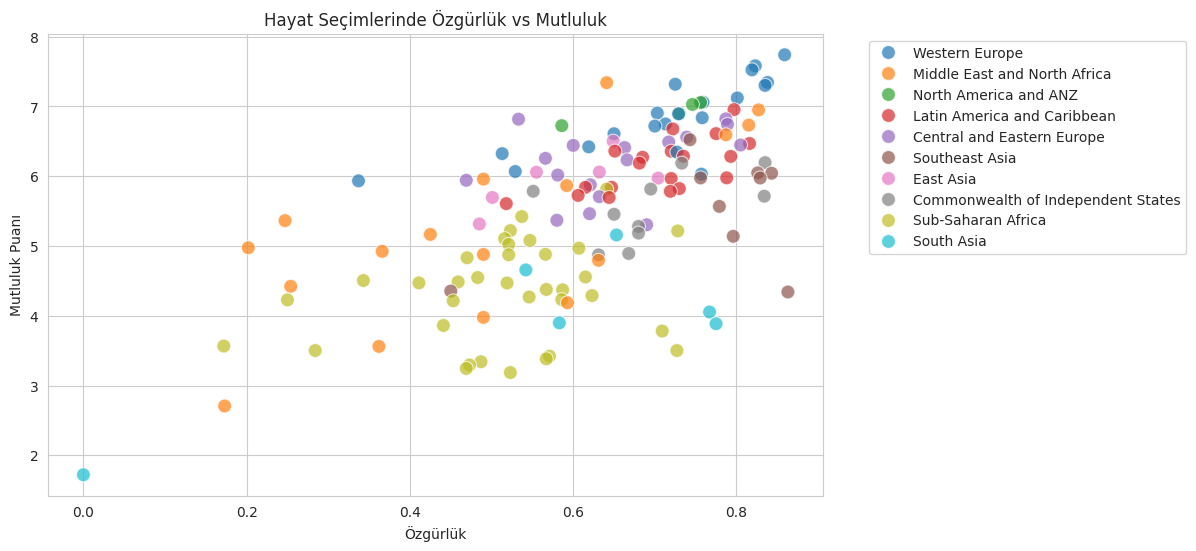

Özgürlük puanı yüksek olan ülkelerin genellikle mutluluk puanlarının da yüksek olduğu kümeleşmenin sağ üstte olduğu görülmektedir.


In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Özgürlük', y='Mutluluk Puanı', hue='Bölge', s=100, alpha=0.7)
plt.title('Hayat Seçimlerinde Özgürlük vs Mutluluk')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print("Özgürlük puanı yüksek olan ülkelerin genellikle mutluluk puanlarının da yüksek olduğu kümeleşmenin sağ üstte olduğu görülmektedir.")

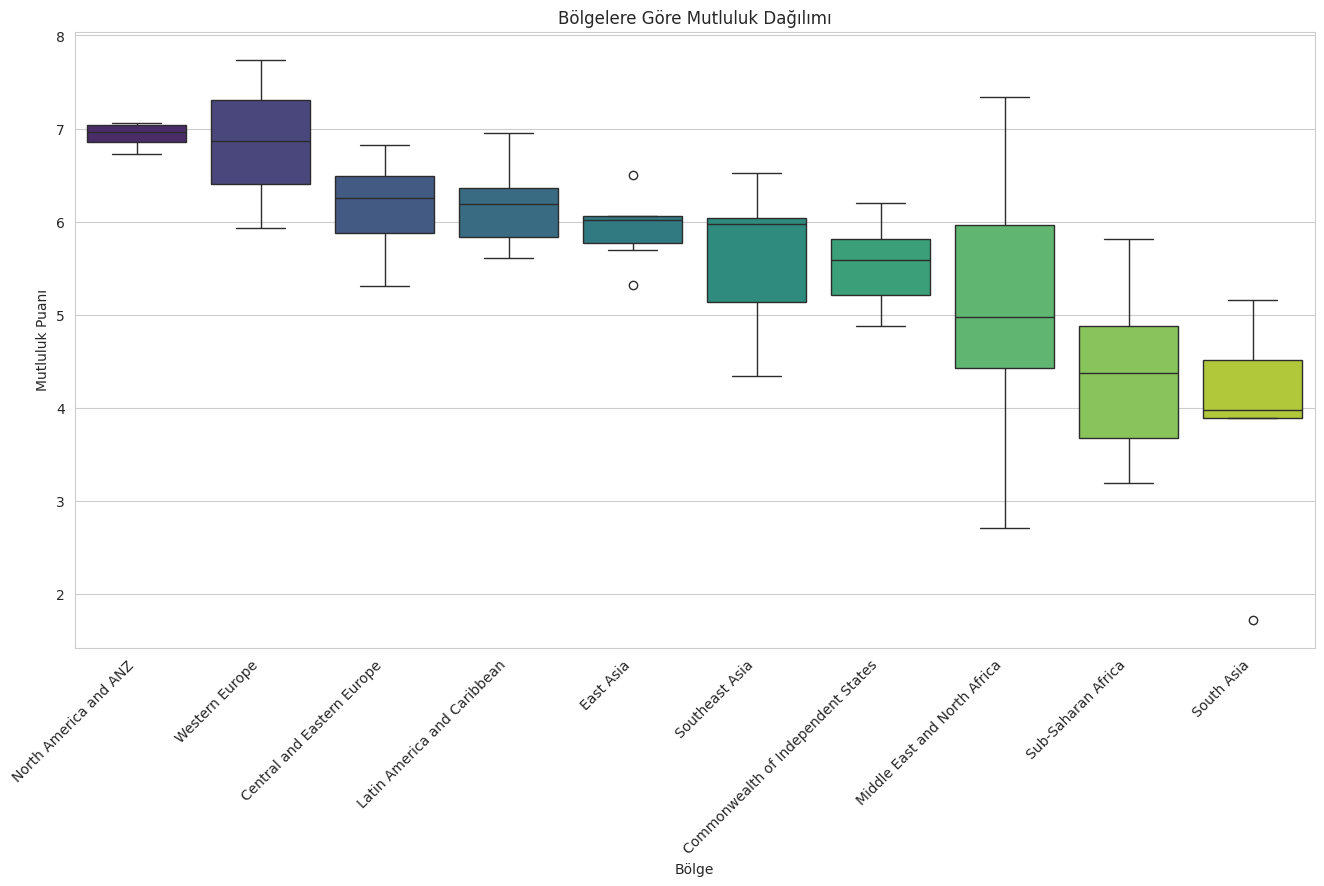

Yorum: Kuzey Amerika ve Avustralya bölgesi oldukça istikrarlı ve mutlu. Ancak Orta Doğu ve Kuzey Afrika kutusunun geniş olması, bu bölgede çok mutlu (İsrail, BAE) ve çok mutsuz (Lübnan, Afganistan) ülkelerin bir arada olduğunu gösteriyor.


In [51]:
plt.figure(figsize=(16, 8))

order = df.groupby('Bölge')['Mutluluk Puanı'].median().sort_values(ascending=False).index

sns.boxplot(x='Bölge', y='Mutluluk Puanı', data=df, order=order, palette='viridis')
plt.title('Bölgelere Göre Mutluluk Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mutluluk Puanı')
plt.show()
print ("Yorum: Kuzey Amerika ve Avustralya bölgesi oldukça istikrarlı ve mutlu. Ancak Orta Doğu ve Kuzey Afrika kutusunun geniş olması, bu bölgede çok mutlu (İsrail, BAE) ve çok mutsuz (Lübnan, Afganistan) ülkelerin bir arada olduğunu gösteriyor.")

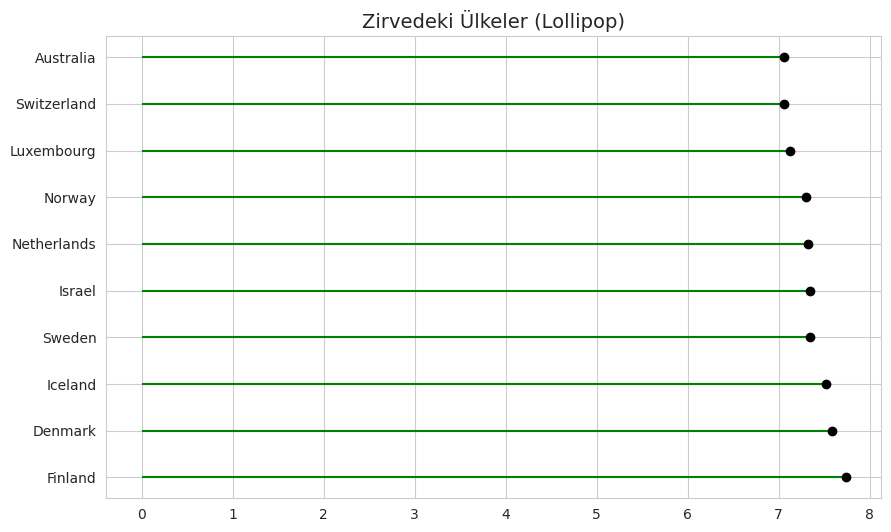

In [52]:



plt.figure(figsize=(10, 6))
plt.hlines(y=top10['Ülke'], xmin=0, xmax=top10['Mutluluk Puanı'], color='green')
plt.plot(top10['Mutluluk Puanı'], top10['Ülke'], "o", color='black')
plt.title("Zirvedeki Ülkeler (Lollipop)", fontsize=14)
plt.show()

In [53]:
import plotly.io as pio
pio.renderers.default = "iframe"
fig = px.scatter(df, x="Gelir", y="Mutluluk Puanı",
                 color="Bölge", size="Mutluluk Puanı", hover_name="Ülke",
                 trendline="ols",
                 title=" Ekonomik Refah (GDP) ve Mutluluk İlişkisi")
fig.show()
print ("Grafikteki trend çizgisi (regresyon), gelir düzeyi arttıkça mutluluğun da arttığını istatistiksel olarak doğrulamaktadır. Grafiğin trend çizgisinin çok altında veya üstünde kalan ülkeler, paranın her şeyi açıklamadığını gösterir. Örneğin Latin Amerika ülkeleri, gelirlerine oranla beklenenden daha mutluyken; bazı Doğu Asya ülkeleri yüksek gelire rağmen daha düşük mutluluk skoruna sahiptir.")

Grafikteki trend çizgisi (regresyon), gelir düzeyi arttıkça mutluluğun da arttığını istatistiksel olarak doğrulamaktadır. Grafiğin trend çizgisinin çok altında veya üstünde kalan ülkeler, paranın her şeyi açıklamadığını gösterir. Örneğin Latin Amerika ülkeleri, gelirlerine oranla beklenenden daha mutluyken; bazı Doğu Asya ülkeleri yüksek gelire rağmen daha düşük mutluluk skoruna sahiptir.


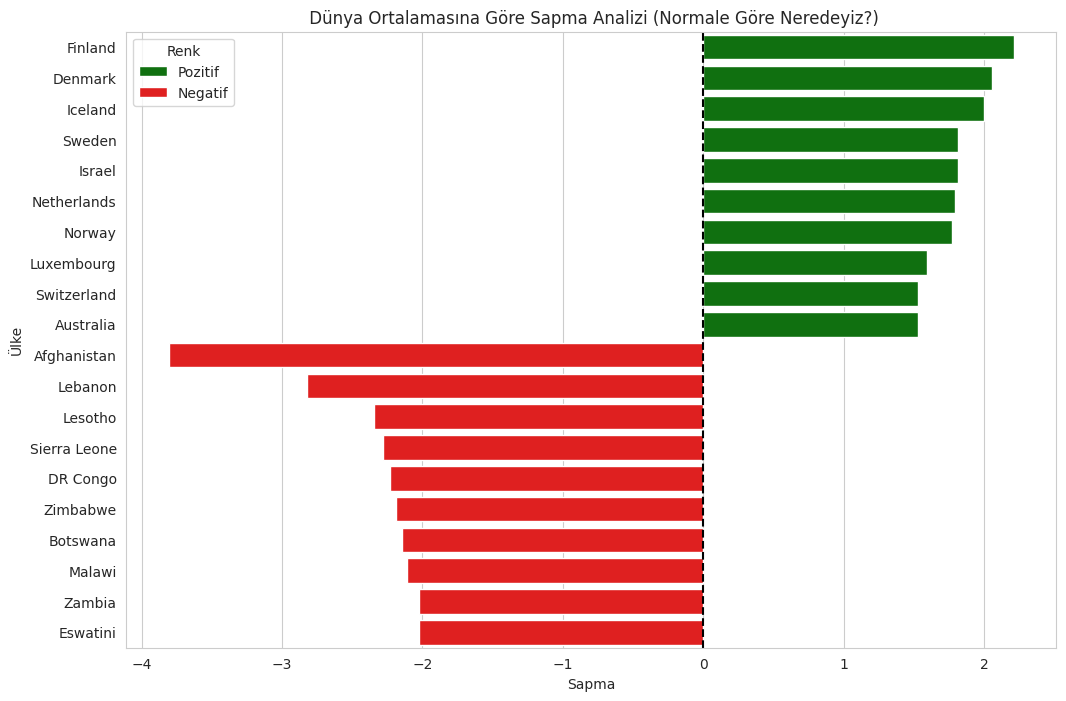

 Yorum: Bu grafik, Normal kabul edilen dünya ortalamasına göre ülkelerin konumunu gösterir.Yeşil Çubuklar:Küresel standardın üzerinde yaşam kalitesi sunan ülkeler. Kırmızı Çubuklar: Küresel ortalamanın altında kalarak acil iyileştirmeye ihtiyaç duyan ülkeler. Bu analiz, uluslararası yardım kuruluşları için öncelikli bölgeleri belirlemede kullanılabilir.


In [54]:
df['Sapma'] = df['Mutluluk Puanı'] - df['Mutluluk Puanı'].mean()
df['Renk'] = ['Pozitif' if x > 0 else 'Negatif' for x in df['Sapma']]

sample = pd.concat([df.nlargest(10, 'Sapma'), df.nsmallest(10, 'Sapma')])

plt.figure(figsize=(12, 8))
sns.barplot(x='Sapma', y='Ülke', data=sample, hue='Renk', palette={'Pozitif': 'g', 'Negatif': 'r'})
plt.title(" Dünya Ortalamasına Göre Sapma Analizi (Normale Göre Neredeyiz?)")
plt.axvline(0, color='black', linestyle='--')
plt.show()
print (" Yorum: Bu grafik, Normal kabul edilen dünya ortalamasına göre ülkelerin konumunu gösterir.Yeşil Çubuklar:Küresel standardın üzerinde yaşam kalitesi sunan ülkeler. Kırmızı Çubuklar: Küresel ortalamanın altında kalarak acil iyileştirmeye ihtiyaç duyan ülkeler. Bu analiz, uluslararası yardım kuruluşları için öncelikli bölgeleri belirlemede kullanılabilir.")

In [55]:
import plotly.io as pio
pio.renderers.default = "iframe"
comp_df = pd.concat([df.nlargest(3, 'Mutluluk Puanı'), df.nsmallest(3, 'Mutluluk Puanı')])
dims = ['Mutluluk Puanı', 'Gelir', 'Sosyal Destek', 'Özgürlük', 'Yolsuzluk Algısı']

fig = px.parallel_coordinates(comp_df, dimensions=dims, color="Mutluluk Puanı",
                              title="7. Ülke Profillerinin Karşılaştırılması (Paralel Koordinatlar)")
fig.show()
print (" Bu grafik, Mutlu ülke ile Mutsuz ülke arasındaki farkı gösterir.Üstteki Çizgiler Sarı: En mutlu ülkeler tüm eksenlerde (Gelir, Destek, Özgürlük) en üstte seyrederken, sadece Yolsuzluk ekseninde aşağı inmektedir. Alttaki Çizgiler (Mor/Mavi): Mutsuz ülkeler ise tüm pozitif faktörlerde dipte kalırken, yolsuzluk algısında yukarı fırlamaktadır. Bu, çoklu değişkenlerin birbiriyle nasıl zincirleme etki yarattığını kanıtlar.")

 Bu grafik, Mutlu ülke ile Mutsuz ülke arasındaki farkı gösterir.Üstteki Çizgiler Sarı: En mutlu ülkeler tüm eksenlerde (Gelir, Destek, Özgürlük) en üstte seyrederken, sadece Yolsuzluk ekseninde aşağı inmektedir. Alttaki Çizgiler (Mor/Mavi): Mutsuz ülkeler ise tüm pozitif faktörlerde dipte kalırken, yolsuzluk algısında yukarı fırlamaktadır. Bu, çoklu değişkenlerin birbiriyle nasıl zincirleme etki yarattığını kanıtlar.


In [56]:
import plotly.graph_objects as go
pio.renderers.default = "iframe"
turkey = df[df['Ülke'] == 'Turkey'].iloc[0]
factors = ['Gelir', 'Sosyal Destek', 'Özgürlük', 'Cömertlik', 'Yolsuzluk Algısı']
values = [turkey[f] for f in factors] # Gerçek değerler

fig = go.Figure(go.Waterfall(
    name = "Türkiye", orientation = "v", measure = ["relative"] * 5,
    x = factors, y = values, connector = {"line":{"color":"rgb(63, 63, 63)"}}
))
fig.update_layout(title = " Türkiye'nin Mutluluk Bileşenleri (Şelale Grafiği)")
fig.show()
print ("Yorum: Türkiye'nin grafiğine bakınca aslında sosyal destek konusunda fena değiliz, zor zamanlarda birbirimize kenetlenebiliyoruz. Ama Özgürlük ve Yolsuzluk Algısı kısımları toplam puanımızı biraz aşağı çekmiş gibi görünüyor. Ekonomik faktörler de eklenince tablomuz bu şekilde şekillenmiş.")

Yorum: Türkiye'nin grafiğine bakınca aslında sosyal destek konusunda fena değiliz, zor zamanlarda birbirimize kenetlenebiliyoruz. Ama Özgürlük ve Yolsuzluk Algısı kısımları toplam puanımızı biraz aşağı çekmiş gibi görünüyor. Ekonomik faktörler de eklenince tablomuz bu şekilde şekillenmiş.


In [57]:
import plotly.graph_objects as go
fig = px.sunburst(df, path=['Bölge', 'Ülke'], values='Mutluluk Puanı', color='Mutluluk Puanı',
                  title=" Bölgesel Hiyerarşi (Sunburst)")
fig.show()
print("""


1. Avrupa'nın Renk Uyumu: 'Batı Avrupa' dilimine baktığımızda dış halkadaki
   tüm ülkelerin neredeyse aynı sarı tonunda olduğunu görüyoruz. Yani orada
   mutluluk bir standart haline gelmiş, sürpriz yok.

2. Orta Doğu'nun Karışıklığı: Ama 'Orta Doğu' veya 'Asya' dilimlerine
   baktığımızda renkler çorbaya dönüyor. Çok mutlu olan da var, çok mutsuz olan da.
   Demek ki o bölgelerde büyük bir eşitsizlik hakim.

Kısacası; Batı'da mutluluk 'coğrafi bir kader' iken, Doğu'da ülkeden ülkeye
çok keskin farklar var.
""")




1. Avrupa'nın Renk Uyumu: 'Batı Avrupa' dilimine baktığımızda dış halkadaki
   tüm ülkelerin neredeyse aynı sarı tonunda olduğunu görüyoruz. Yani orada
   mutluluk bir standart haline gelmiş, sürpriz yok.

2. Orta Doğu'nun Karışıklığı: Ama 'Orta Doğu' veya 'Asya' dilimlerine
   baktığımızda renkler çorbaya dönüyor. Çok mutlu olan da var, çok mutsuz olan da.
   Demek ki o bölgelerde büyük bir eşitsizlik hakim.

Kısacası; Batı'da mutluluk 'coğrafi bir kader' iken, Doğu'da ülkeden ülkeye
çok keskin farklar var.



In [58]:
print("Grafikler plotly kütüphanesi nedeniyle github da doğru gözlemleneyebilir. Kaggle linki: https://www.kaggle.com/code/elifecedoan/world-h-r-2")

Grafikler plotly kütüphanesi nedeniyle github da doğru gözlemleneyebilir. Kaggle linki: https://www.kaggle.com/code/elifecedoan/world-h-r-2?scriptVersionId=289140655
